# K-Means Clustering of Iris Dataset

## Import libraries

In [104]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [105]:
def dataframe_to_array(df: pd.DataFrame):
    """
    Converts a pandas DataFrame into a 2D NumPy array, excluding column names.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame to be converted.
    
    Returns:
    array (numpy.ndarray): A 2D NumPy array containing only the values from the 
    DataFrame.
    """
    return df.values

In [106]:
def euclidean_distance(p1, p2):
    """
    Calculates the Euclidean distance between two 4D points.
    
    Parameters:
    p1 (list): A list of 4 numbers representing the coordinates of the first point.
    p2 (list): A list of 4 numbers representing the coordinates of the second point.
    
    Returns:
    distance (float): The Euclidean distance between the two points.
    """
    sum_of_squares = 0
    for i, j in zip(p1, p2):
        sum_of_squares += (i - j)**2
    distance = math.sqrt(sum_of_squares)
    return distance


## Load the iris dataset

In [107]:
iris = pd.read_csv("./iris-dataset.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Split the data into features and labels

In [108]:
X = iris.iloc[:, :-1]
y_true = iris.iloc[:, -1]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## The K-means algorithm

The K-means algorithm aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean.
The algorithm works as follows:

1. Choose k initial centroids randomly from the data points.
2. Assign each data point to the cluster with the nearest centroid.
3. Recalculate the centroids of each cluster as the mean of the data points assigned to it.
4. Repeat steps 2 and 3 until the cluster assignments no longer change or a maximum number of iterations is reached.

The algorithm converges to a local optimum, which may not be the global optimum. 
The result of the K-means algorithm depends on the initial choice of centroids, so it is often run multiple times with different initializations to obtain a more robust clustering.

In [109]:

def implement_kmeans():
    # Define the number of clusters and the maximum number of iterations
    K = 3
    max_iters = 100
    data_range = range(len(X.index))

    # Initialize the centroids by randomly selecting K data points
    np.random.seed(123)
    centroids = X.iloc[np.random.choice(
        data_range, K), :].reset_index(drop=True)
    
    X['predicted_species'] = [-1]*X.shape[0]
    
    # Loop over the maximum number of iterations
    for i in range(max_iters):
        # Assign each data point to the nearest centroid
        for k in data_range:
            centroids_array = dataframe_to_array(centroids)
            p = dataframe_to_array(X.iloc[[k]])[0]

            distances = [euclidean_distance(p, x) for x in centroids_array]

            min_index = distances.index(min(distances))
            X.loc[k, "predicted_species"] = min_index

        # Update the centroids as the mean of the assigned data points
        for j in range(K):
            centroids.loc[j, :] = np.mean(X[X["predicted_species"] == j].iloc[:, :-1], 
                                          axis=0)

    # Add the predicted labels to the DataFrame
    iris['predicted_species'] = X['predicted_species']

implement_kmeans()

## Plot the results

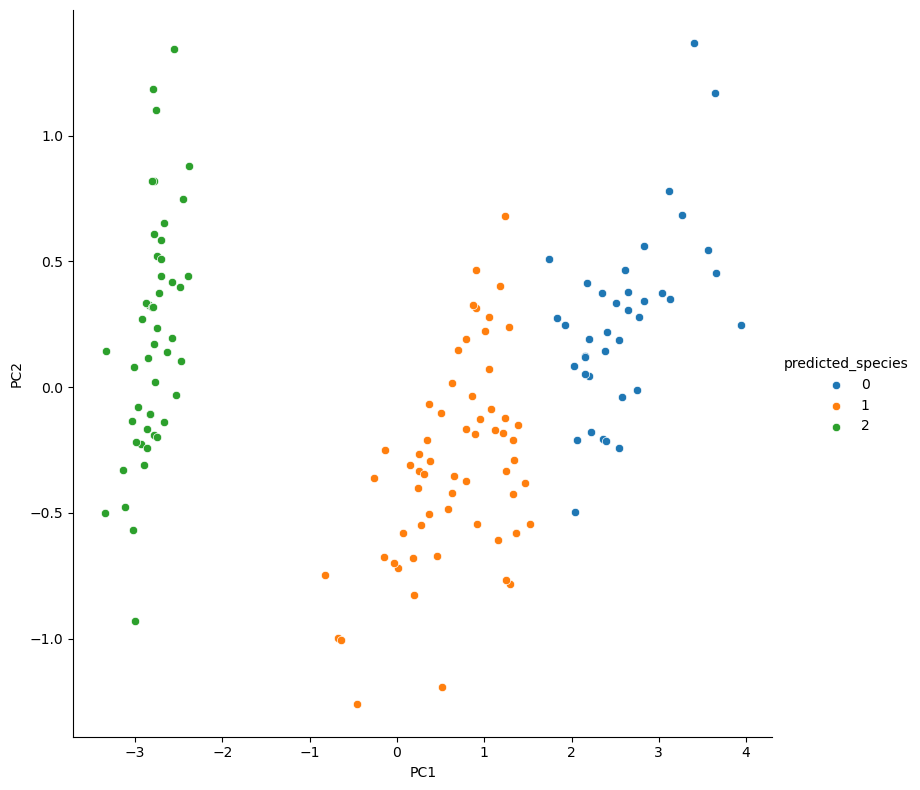

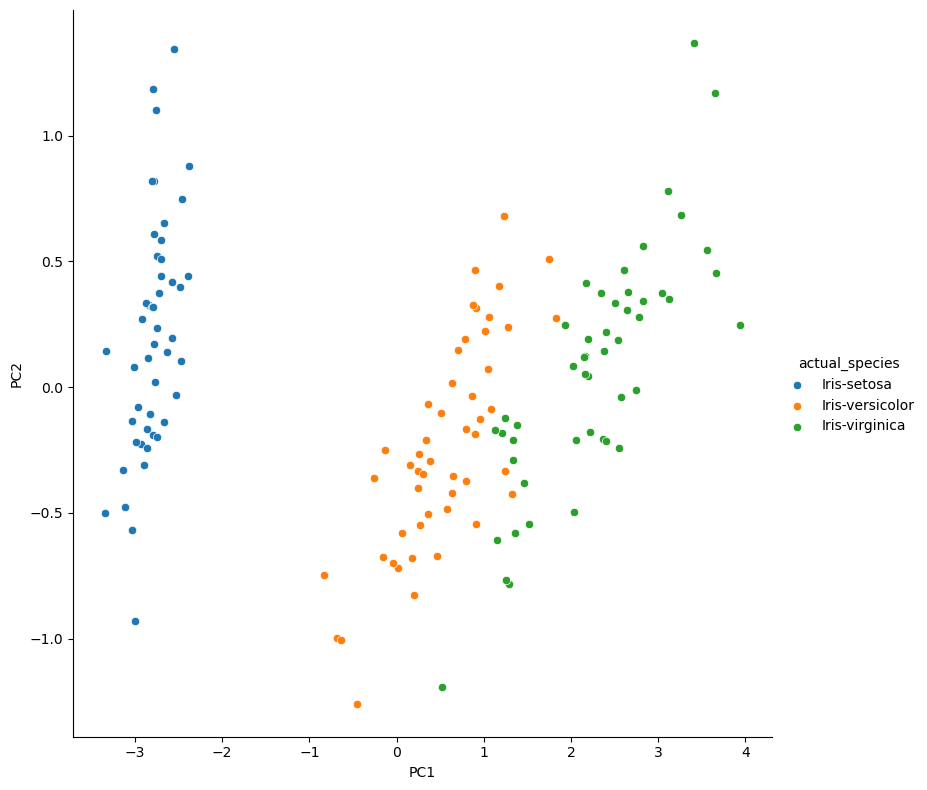

In [113]:
# Plot the results
pca = PCA(n_components=2)
X_ = pca.fit_transform(X)
X_ = pd.DataFrame(X_, columns=["PC1", "PC2"])
X_['predicted_species'] = iris['predicted_species']
X_['actual_species'] = iris['species']

sns.FacetGrid(X_, hue="predicted_species", height=8).map(
    sns.scatterplot, "PC1", "PC2").add_legend()

sns.FacetGrid(X_, hue="actual_species", height=8).map(
    sns.scatterplot, "PC1", "PC2").add_legend()


## 3d scatterplot using matplotlib

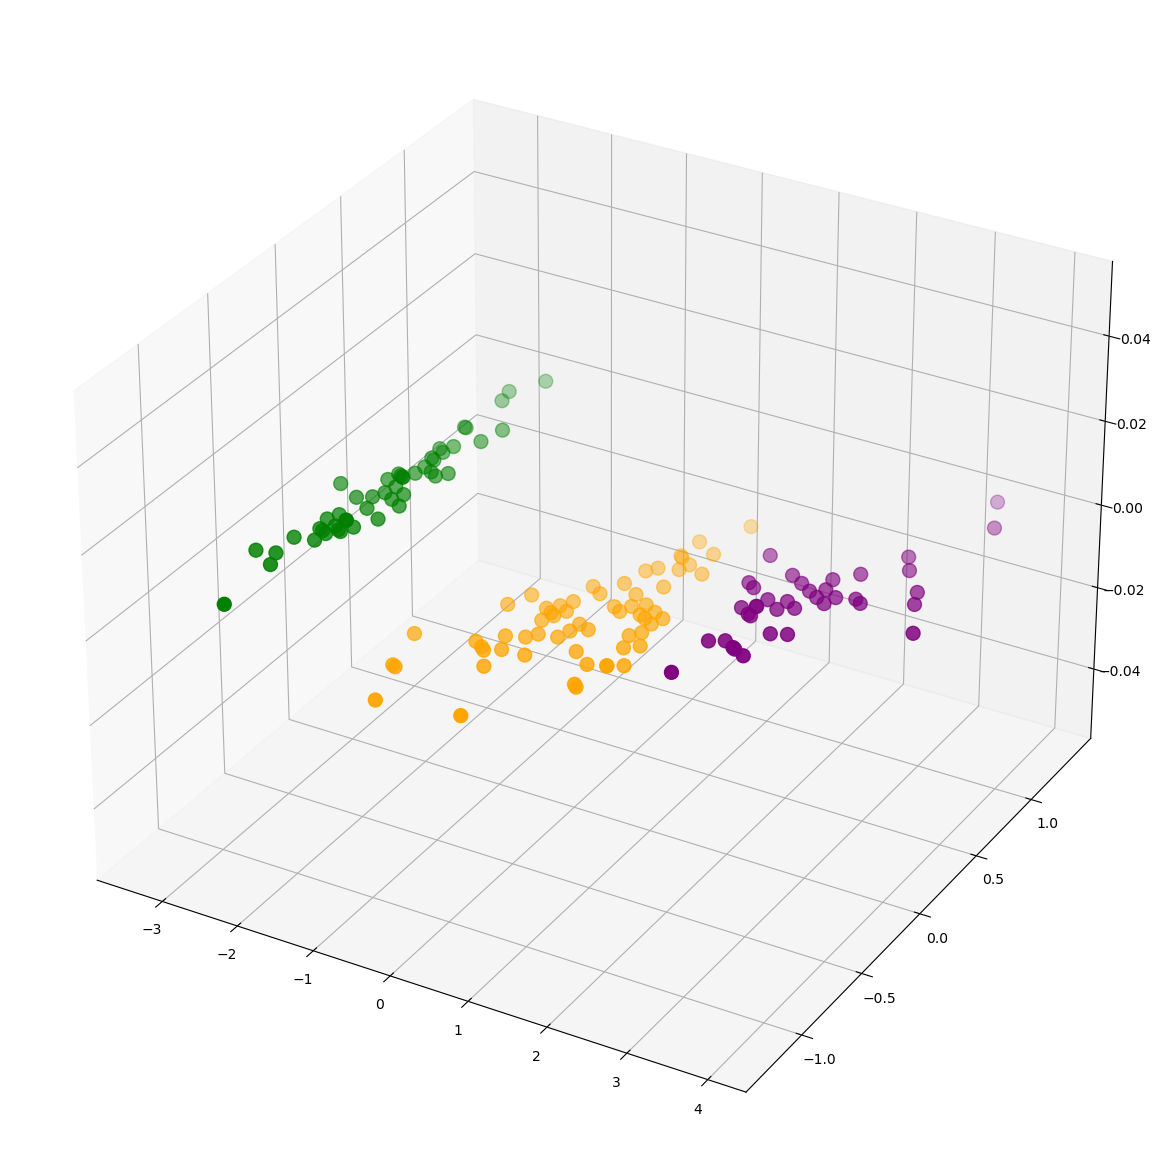

In [111]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(X_.loc[X_["predicted_species"] == 0, "PC1"], 
            X_.loc[X_["predicted_species"] == 0, "PC2"], 
            s = 100, c = 'purple', label = 'Iris-setosa')

plt.scatter(X_.loc[X_["predicted_species"] == 1, "PC1"], 
            X_.loc[X_["predicted_species"] == 1, "PC2"], 
            s = 100, c = 'orange', label = 'Iris-versicolour')

plt.scatter(X_.loc[X_["predicted_species"] == 2, "PC1"], 
            X_.loc[X_["predicted_species"] == 2, "PC2"], 
            s = 100, c = 'green', label = 'Iris-virginica')

plt.show()

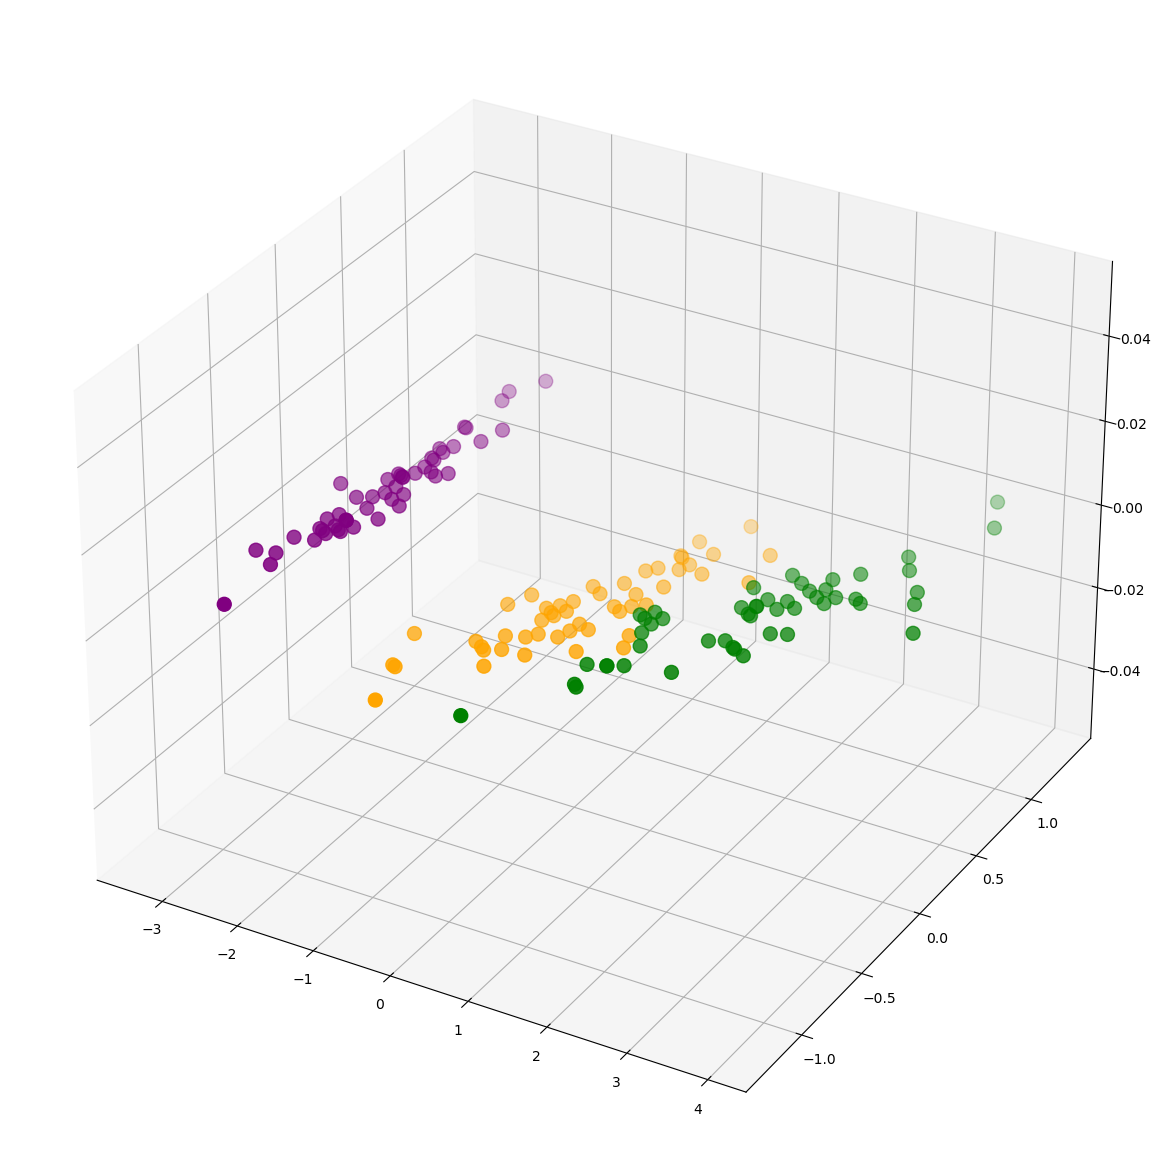

In [112]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(X_.loc[X_["actual_species"] == "Iris-setosa", "PC1"], 
            X_.loc[X_["actual_species"] == "Iris-setosa", "PC2"], 
            s = 100, c = 'purple', label = 'Iris-setosa')

plt.scatter(X_.loc[X_["actual_species"] == 'Iris-versicolor', "PC1"], 
            X_.loc[X_["actual_species"] == 'Iris-versicolor', "PC2"], 
            s=100, c='orange', label='Iris-versicolour')

plt.scatter(X_.loc[X_["actual_species"] == 'Iris-virginica', "PC1"], 
            X_.loc[X_["actual_species"] == 'Iris-virginica', "PC2"], 
            s = 100, c = 'green', label = 'Iris-virginica')

plt.show()

## Computimg metrics

The Silhouette score is a metric that measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, with a higher score indicating better clustering. The Davies-Bouldin score is a metric that measures the average similarity between each cluster and its most similar cluster, with a lower score indicating better clustering.

In [114]:
iris.loc[iris['species'] == "Iris-setosa", 'species'] = 2
iris.loc[iris['species'] == "Iris-versicolor", 'species'] = 1
iris.loc[iris['species'] == "Iris-virginica", 'species'] = 0

# Compute the Silhouette score
silhouette = silhouette_score(iris.iloc[:, :-1], iris["predicted_species"])
print("Silhouette score: {:.3f}".format(silhouette))

# Compute the Davies-Bouldin score
davies_bouldin = davies_bouldin_score(iris.iloc[:, :-1], iris["predicted_species"])
print("Davies-Bouldin score: {:.3f}".format(davies_bouldin))


Silhouette score: 0.553
Davies-Bouldin score: 0.668
